In [560]:
#!python -m pip install pandas apyori
import pandas as pd
from apyori import apriori

df = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
colnames = df.columns
colnames

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [562]:
#df = df.iloc[1:].reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [563]:
transactions = []

for i in range(len(df)):
    row = df.iloc[i].dropna()                # remove NaN values
    row = [str(item).strip() for item in row if str(item).strip() != ""]
    transactions.append(row)

#transactions

In [564]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_onehot = pd.DataFrame(te_array, columns = te.columns_)
df_onehot = df_onehot.astype(int)
df_onehot

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [565]:
colnames = df_onehot.columns.tolist()
#colnames  # 120 items

# apyori

In [566]:
transactions = []

for i in range(0, df_onehot.shape[0]):
    transact =  [] 
    for j in range(0, df_onehot.shape[1]):
        if df_onehot.values[i, j]== 1:
            transact.append(colnames[j])
    transactions.append(transact)

transactions

print(transactions[0:4])

[['almonds', 'antioxydant juice', 'avocado', 'cottage cheese', 'energy drink', 'frozen smoothie', 'green grapes', 'green tea', 'honey', 'low fat yogurt', 'mineral water', 'olive oil', 'salad', 'salmon', 'shrimp', 'spinach', 'tomato juice', 'vegetables mix', 'whole weat flour', 'yams'], ['burgers', 'eggs', 'meatballs'], ['chutney'], ['avocado', 'turkey']]


In [567]:
results = list(apriori(transactions = transactions,
                       min_support = 0.01,
                       min_confidence = 0.4,
                       min_lift = 1))#, min_length = 1, max_length = 5))
#results

In [ ]:
data = []
print("Rule Supp. Conf. Lift")
print(80*"-")

for a in results:
    rules = a.ordered_statistics
    support = a.support
    items = a.items
    
    # print(support)
    # print(rules)
    for b in rules:
        lhs     = b.items_base
        rhs     = b.items_add
        conf    = b.confidence
        lift    = b.lift
        data.append([lhs, rhs, support, conf, lift])
        print("%s  ---> %s  %6.4f %6.4f %f" %(lhs, rhs, support, conf, lift))
        print("")

print("Number of rules is " + str(len(data)))

Rule Supp. Conf. Lift
--------------------------------------------------------------------------------
frozenset({'ground beef'})  ---> frozenset({'mineral water'})  0.0409 0.4166 1.747522

frozenset({'olive oil'})  ---> frozenset({'mineral water'})  0.0276 0.4190 1.757904

frozenset({'salmon'})  ---> frozenset({'mineral water'})  0.0171 0.4013 1.683336

frozenset({'soup'})  ---> frozenset({'mineral water'})  0.0231 0.4565 1.914955

frozenset({'chocolate', 'eggs'})  ---> frozenset({'mineral water'})  0.0135 0.4056 1.701663

frozenset({'chocolate', 'ground beef'})  ---> frozenset({'mineral water'})  0.0109 0.4740 1.988472

frozenset({'chocolate', 'milk'})  ---> frozenset({'mineral water'})  0.0140 0.4357 1.827780

frozenset({'chocolate', 'spaghetti'})  ---> frozenset({'mineral water'})  0.0159 0.4048 1.698053

frozenset({'eggs', 'ground beef'})  ---> frozenset({'mineral water'})  0.0101 0.5067 2.125563

frozenset({'milk', 'eggs'})  ---> frozenset({'mineral water'})  0.0131 0.4242 1.7797

In [569]:
columns = ["LHS", "RHS", "Support", "Confidence", "Lift"]
rules= pd.DataFrame(data, columns = columns)
rules

,LHS,RHS,Support,Confidence,Lift
0,(ground beef),(mineral water),0.040928,0.416554,1.747522
1,(olive oil),(mineral water),0.027596,0.419028,1.757904
2,(salmon),(mineral water),0.017064,0.401254,1.683336
3,(soup),(mineral water),0.023064,0.456464,1.914955
4,"(chocolate, eggs)",(mineral water),0.013465,0.405622,1.701663
5,"(chocolate, ground beef)",(mineral water),0.010932,0.473988,1.988472
6,"(chocolate, milk)",(mineral water),0.013998,0.435685,1.827780
7,"(chocolate, spaghetti)",(mineral water),0.015865,0.404762,1.698053
8,"(eggs, ground beef)",(mineral water),0.010132,0.506667,2.125563
9,"(milk, eggs)",(mineral water),0.013065,0.424242,1.779778


In [570]:
#rules.nlargest(8, columns = 'Confidence')

In [571]:
#rules.nlargest(8, columns = 'Support')

In [572]:
#data1.nlargest(8, columns = 'Lift')

# Apyori visualisation

In [573]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for _, row in data1.iterrows():
    lhs = row['LHS']
    rhs = row['RHS']
    conf = row['Confidence']
    
    for a in lhs:
        for b in rhs:
            G.add_edge(a, b, weight=conf)

In [574]:
node_sizes = [len(str(node)) * 300 for node in G.nodes()]

# Edge width proportional to confidence
edge_widths = [G[u][v]['weight']*5 for u,v in G.edges()]  # scale factor 5


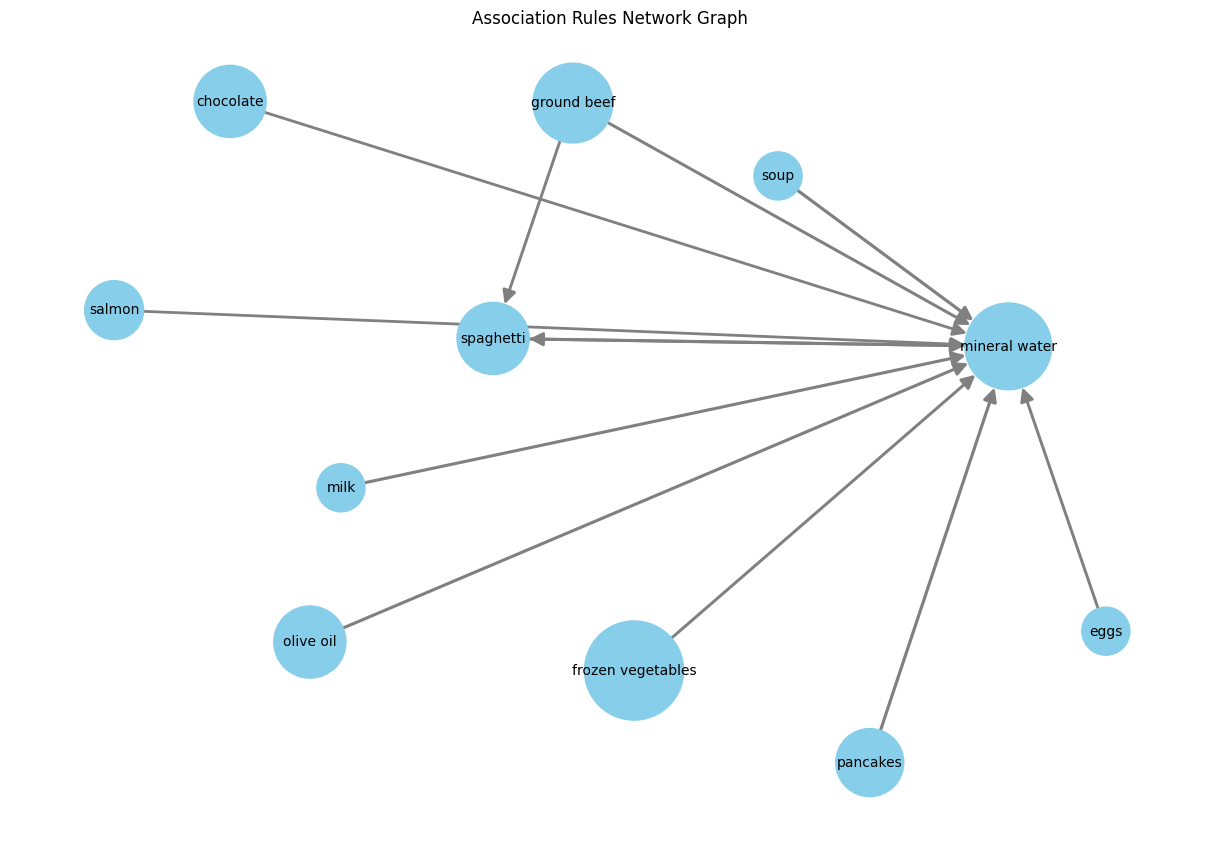

In [575]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # positions for all nodes

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    width=edge_widths,
    edge_color="gray",
    node_color="skyblue",
    font_size=10,
    arrowsize=20
)

plt.title("Association Rules Network Graph")
plt.show()

# mlxtend apriori

In [576]:
from mlxtend.frequent_patterns import apriori, association_rules

# muuta tiedot 0/1-> boolean, mxlextend apriori antaa virheilmoituksen muuten

df_bool = df_onehot.astype(bool)

# Hae tyypillisimmät ostostapahtumat 

frequent_itemsets = apriori(df_bool, min_support = 0.01, use_colnames = True)

#Suodata ostotapahtumat sen mukaan, missä on eniten tuotteita, len()-hakee tapahtuman pituuden 
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

frequent_itemsets.nlargest(10, 'length')

,support,itemsets,length
240,0.013465,"(chocolate, eggs, mineral water)",3
241,0.010532,"(chocolate, spaghetti, eggs)",3
242,0.010932,"(chocolate, ground beef, mineral water)",3
243,0.013998,"(chocolate, milk, mineral water)",3
244,0.010932,"(chocolate, spaghetti, milk)",3
245,0.015865,"(chocolate, spaghetti, mineral water)",3
246,0.010132,"(eggs, ground beef, mineral water)",3
247,0.013065,"(milk, eggs, mineral water)",3
248,0.014265,"(spaghetti, eggs, mineral water)",3
249,0.010132,"(french fries, spaghetti, mineral water)",3


# Määritä assosiaatiosäännöt

min_threshold : float (default: 0.8) Minimal threshold for the evaluation metric, via the metric parameter, to decide whether a candidate rule is of interest.

In [577]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

min_threshold=0.8 vain säännön 'lift' >= 0,8 arvot otetaan huomioon selvitä mitä muita parametreja voi käyttää

In [578]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,1.0,0.003654,1.016113,0.413630,0.044593,0.015857,0.198329
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,1.0,0.002779,1.018933,0.194767,0.072934,0.018581,0.149934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562
422,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,1.0,0.005593,1.251198,0.504819,0.058384,0.200766,0.202885
423,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,1.0,0.005593,1.034385,0.590626,0.058384,0.033242,0.202885
424,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,1.0,0.005459,1.024059,0.625163,0.045479,0.023494,0.251562


In [579]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
360,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
396,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725
336,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,1.0,0.005434,1.447937,0.508837,0.043640,0.309362,0.259925
384,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,1.0,0.005440,1.434136,0.503555,0.044102,0.302716,0.257674
290,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
421,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562
414,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
410,"(spaghetti, milk)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,1.0,0.007278,1.368879,0.479672,0.060950,0.269475,0.254802
342,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,1.0,0.006340,1.349656,0.467922,0.054574,0.259071,0.247205
402,"(spaghetti, ground beef)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,1.0,0.007722,1.348914,0.470957,0.065507,0.258663,0.253481


In [580]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data2 = pd.DataFrame(te_ary, columns = te.columns_)
data2


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [581]:
frequent_itemsets = apriori(data2, min_support = 0.02, use_colnames = True)
frequent_itemsets

print( "Length of Frequent itemsets is " + str(len(frequent_itemsets)) )

frequent_itemsets['Length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets.nlargest(10, 'Length')

Length of Frequent itemsets is 103


,support,itemsets,Length
53,0.028796,"(eggs, burgers)",2
54,0.021997,"(french fries, burgers)",2
55,0.024397,"(burgers, mineral water)",2
56,0.021464,"(spaghetti, burgers)",2
57,0.027463,"(cake, mineral water)",2
58,0.022797,"(chicken, mineral water)",2
59,0.033196,"(chocolate, eggs)",2
60,0.034395,"(chocolate, french fries)",2
61,0.022930,"(chocolate, frozen vegetables)",2
62,0.023464,"(chocolate, green tea)",2


In [582]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.80)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
2,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
3,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
4,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,1.0,0.008647,1.123778,0.379218,0.103279,0.110144,0.204897
96,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,1.0,0.008756,1.174209,0.444850,0.094474,0.148363,0.209194
97,(spaghetti),(shrimp),0.174110,0.071457,0.021197,0.121746,1.703760,1.0,0.008756,1.057260,0.500143,0.094474,0.054159,0.209194
98,(spaghetti),(tomatoes),0.174110,0.068391,0.020931,0.120214,1.757755,1.0,0.009023,1.058905,0.521973,0.094465,0.055628,0.213129


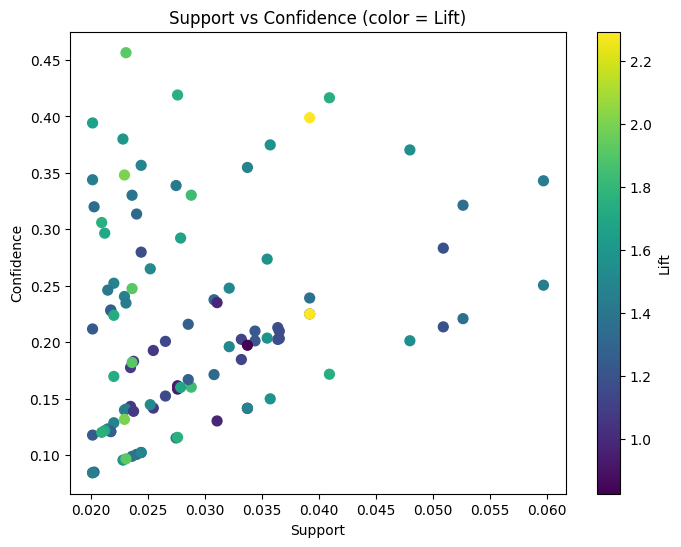

In [583]:
import matplotlib.pyplot as plt


# Assuming rules is a DataFrame with 'Support', 'Confidence', 'Lift'
x = rules['support']
y = rules['confidence']
z = rules['lift']  # use Lift (or any other metric) for color intensity

plt.figure(figsize=(8,6))
scatter = plt.scatter(x, y, c=z, cmap='viridis', s=50)  # c=z sets color by lift, cmap sets color map

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (color = Lift)')
plt.colorbar(scatter, label='Lift')  # add colorbar to show value intensity

plt.show()

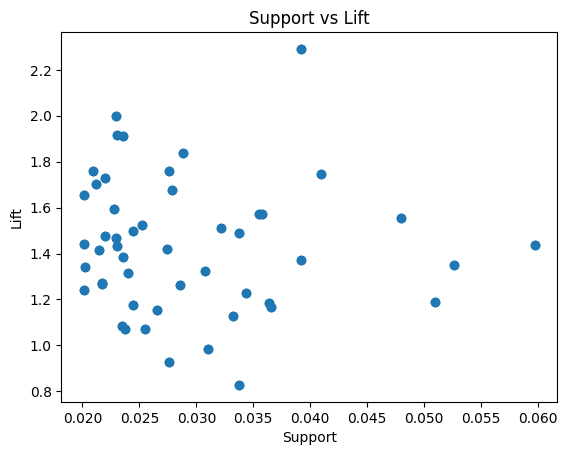

In [584]:
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

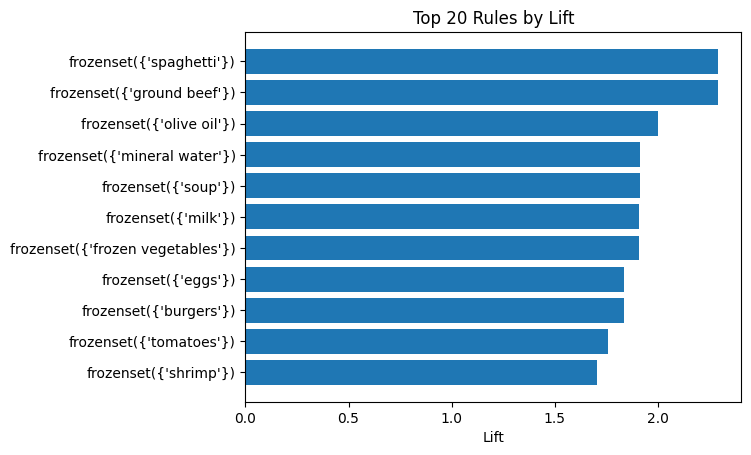

In [585]:
top_lift = rules.sort_values('lift', ascending=False).head(20)

plt.barh(top_lift['antecedents'].astype(str), top_lift['lift'])
plt.xlabel("Lift")
plt.title("Top 20 Rules by Lift")
plt.gca().invert_yaxis()
plt.show()

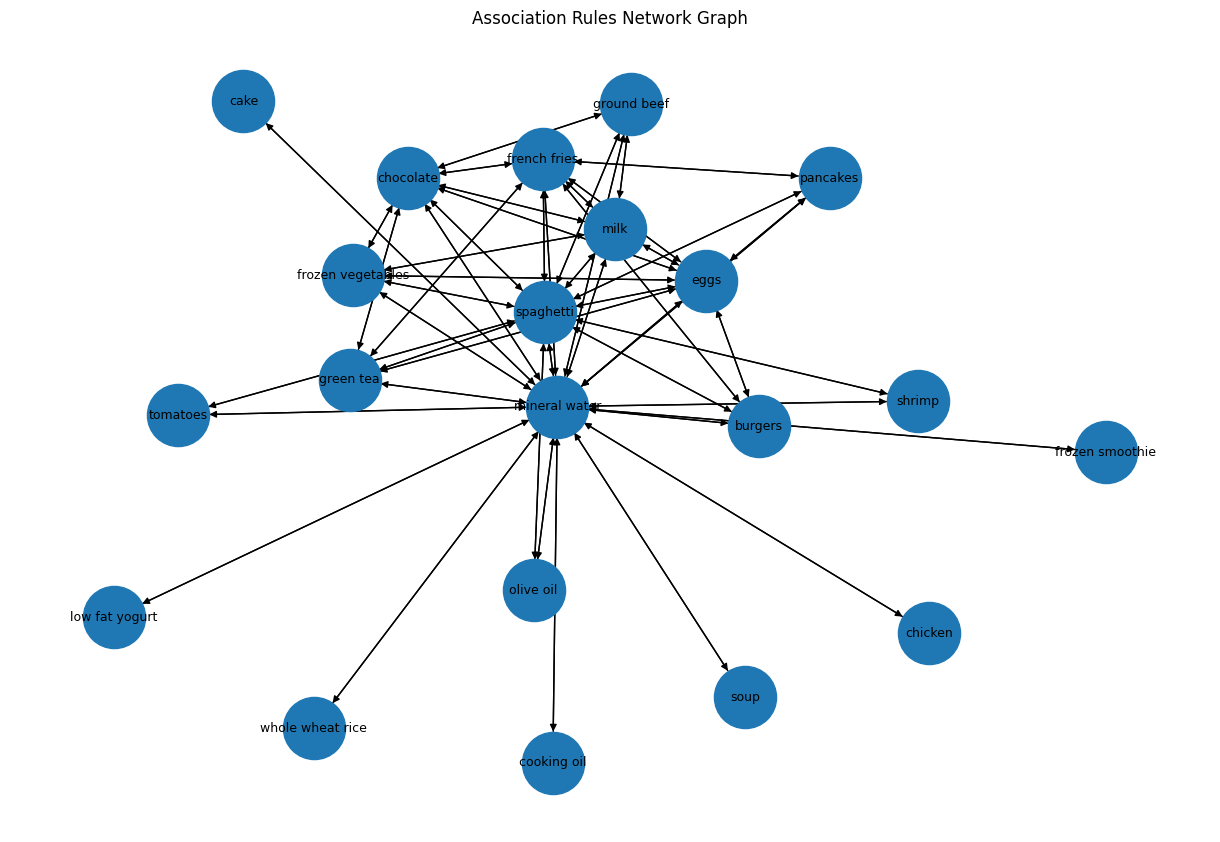

In [586]:
#!python -m pip install networkx
import networkx as nx

G = nx.DiGraph()

for _, row in rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['confidence'])

plt.figure(figsize = (12, 8))
pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, with_labels = True, node_size = 2000,
        font_size = 9, arrows = True)

plt.title("Association Rules Network Graph")
plt.show()

In [587]:
import nbformat
from nbconvert import HTMLExporter

# Load notebook
with open("Market_Basket.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Save HTML
with open("Market_basket.html", "w", encoding="utf-8") as f:
    f.write(body)